# Reporte de Resultados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import arff
import json
pd.set_option('display.max_rows', None)  # This line allows all rows to be displayed
pd.set_option('display.max_columns', None)  # This line allows all columns to be displayed


### Metodología:

En esta documento comparamos experimentos realizados sobre el dataset de 'leukemia' en su version original y aumentada: 

#### Grupo de experimentos con dataset original.
- '0017' utilizando dataset original, cromosoma activo 0.1, 30 pruebas.

#### Grupo de experimentos con dataset aumentado.
- '0014' realizado con dataset aumentado en 2000 observaciones mediante un VAE, cromosoma activo 0.1, 18 pruebas.  
  


In [13]:
data = pd.read_csv('experiments_results.csv')

In [14]:
data.tail(3)

,experiment_name,date,description,current_dir,POP_SIZE,PROB_MUT,PX,GMAX,DAT_SIZE,all_features_fitness,all_feature_ngenes,all_feature_acc,elite_fitness,elite_ngenes,elite_acc,pob_fitness_avg,pob_accuracy_avg,pob_ngenes_avg,pob_fitness_std,pob_accuracy_std,pob_ngenes_std,pob_fitness_max,pob_accuracy_max,pob_ngenes_max
422,gcm_base_0040_2,2024-06-13,gene01_mut160_cvaelossL1_genevalonsyn_gatraino...,/root/ealab/expga1,100,160,0.75,20,144,0.076,16063,0.152,0.713,1548,0.522,0.713,0.522,1548.0,0.0,0.0,0.0,0.713,0.522,1548
423,gcm_base_0040_3,2024-06-14,gene01_mut160_cvaelossL1_genevalonsyn_gatraino...,/root/ealab/expga1,100,160,0.75,20,144,0.076,16063,0.152,0.701,1566,0.500,0.701,0.500,1566.0,0.0,0.0,0.0,0.701,0.500,1566
424,gcm_base_0040_4,2024-06-14,gene01_mut160_cvaelossL1_genevalonsyn_gatraino...,/root/ealab/expga1,100,160,0.75,20,144,0.076,16063,0.152,0.714,1500,0.522,0.714,0.522,1500.0,0.0,0.0,0.0,0.714,0.522,1500


In [38]:
data.columns

Index(['experiment_name', 'date', 'description', 'current_dir', 'POP_SIZE',
       'PROB_MUT', 'PX', 'GMAX', 'DAT_SIZE', 'all_features_fitness',
       'all_feature_ngenes', 'all_feature_acc', 'elite_fitness',
       'elite_ngenes', 'elite_acc', 'pob_fitness_avg', 'pob_accuracy_avg',
       'pob_ngenes_avg', 'pob_fitness_std', 'pob_accuracy_std',
       'pob_ngenes_std', 'pob_fitness_max', 'pob_accuracy_max',
       'pob_ngenes_max'],
      dtype='object')

In [19]:
mandelon = data[data['experiment_name'].str.contains('mandelon')]
# extract the firts 18 letters of the experiment name
mandelon['experiment_group'] = mandelon['experiment_name'].apply(lambda x: x[:18])
# count the unique value on the column 'experiment_name'
mandelon['experiment_group'].value_counts()

/tmp/ipykernel_186868/1674984077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mandelon['experiment_group'] = mandelon['experiment_name'].apply(lambda x: x[:18])


experiment_group
mandelon_synthetic    30
mandelon_base_0023    30
mandelon_base_0017    19
mandelon_base_0004    10
mandelon_base_0021     2
Name: count, dtype: int64

#### Experimentos excluidos

Excluiremos del análisis experimentos madelon_base_004 por ser un experimento de 10 pruebas iniciales.

In [20]:
# Remove 'leukemia_base_0008' from the data
mandelon = mandelon[mandelon['experiment_group'] != 'mandelon_base_0004']
mandelon = mandelon[mandelon['experiment_group'] != 'mandelon_base_0021']


In [21]:
# Compare original data vs augmented data
original_data = ['mandelon_base_0017', 'mandelon_base_0023']

In [24]:
# rename experiment names label 
mandelon = mandelon.replace('mandelon_base_0017', 'mandelon_original')
mandelon = mandelon.replace('mandelon_base_0023', 'mandelon_original')

# Resultados

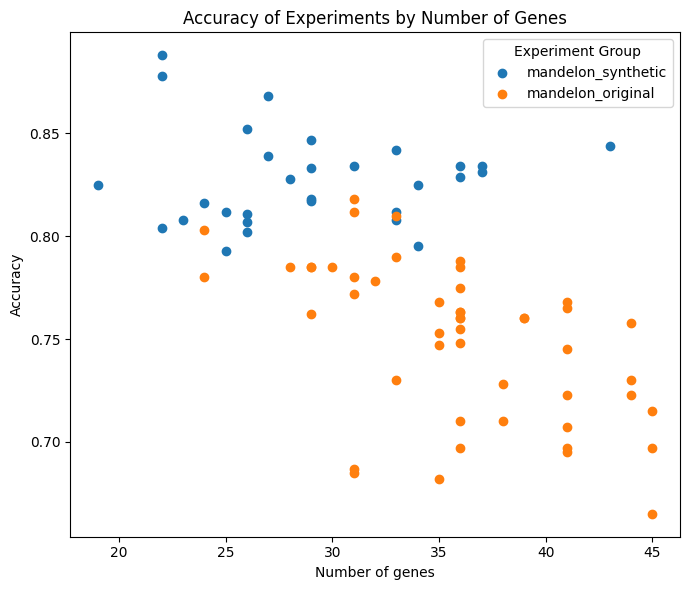

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Factorize the 'experiment_group' to get labels and unique ids
groups, labels = pd.factorize(mandelon['experiment_group'])


# Set up the matplotlib figure
plt.figure(figsize=(7, 6))

# Plot all data without condition on 'pob_ngenes_avg'
for i, label in enumerate(labels):
    group_data = mandelon[groups == i]
    plt.scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)

# Set plot titles and labels
plt.title('Accuracy of Experiments by Number of Genes')
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')

# Add a legend to the plot
plt.legend(title="Experiment Group")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [8]:
# calculate the mean of the accuracy by experiment group
mean_acc = mandelon.groupby('experiment_group')['pob_accuracy_avg'].mean()
mean_acc

experiment_group
mandelon_original     0.749939
mandelon_synthetic    0.827800
Name: pob_accuracy_avg, dtype: float64

In [11]:
# calculate the % improvement of the 'mandelon_synthetic' over the 'mandelon_original'
incremento_percentual = 100 * (mean_acc['mandelon_synthetic'] - mean_acc['mandelon_original']) / mean_acc['mandelon_original']
incremento_percentual

10.382344136936352

In [12]:
syn_convergence = [7,14,15,15,16,12,14,9,18,14,11, # 11
                ]
ori_convergence = [9,14,6,14,14,15,14,10,11,17,18, # 11
                ]
# mean 
mean_syn_convergence = np.mean(syn_convergence)
mean_ori_convergence = np.mean(ori_convergence)
print(mean_syn_convergence, mean_ori_convergence)

13.181818181818182 12.909090909090908


## Gráfico de resultados por grupo de experimentos

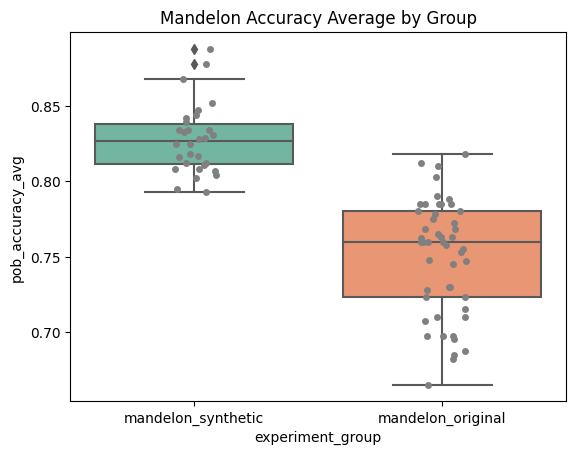

In [9]:
# plot the leukemias accuracy average by group
# set the same palette for all plots
sns.set_palette("Set2")
sns.boxplot(x='experiment_group', y='pob_accuracy_avg', data=mandelon)
# add data point in grey
sns.stripplot(x='experiment_group', y='pob_accuracy_avg', data=mandelon, color='grey')
plt.title('Mandelon Accuracy Average by Group')
plt.show()


# Gisette

In [41]:
gisette = data[data['experiment_name'].str.contains('gisette')]
# extract the firts 18 letters of the experiment name
gisette['experiment_group'] = gisette['experiment_name'].apply(lambda x: x[:17])
# count the unique value on the column 'experiment_name'
gisette['experiment_group'].value_counts()

/tmp/ipykernel_186868/3447728379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gisette['experiment_group'] = gisette['experiment_name'].apply(lambda x: x[:17])


experiment_group
gisette_base_0025    17
gisette_base_0005    13
gisette_base_0024    12
gisette_base_0022    10
gisette_base_0020     2
Name: count, dtype: int64

#### Experimentos excluidos

Excluiremos del análisis experimentos 

In [ ]:
# Remove 'leukemia_base_0008' from the data
# mandelon = mandelon[mandelon['experiment_group'] != 'mandelon_base_0004']
# mandelon = mandelon[mandelon['experiment_group'] != 'mandelon_base_0021']


In [42]:
# Compare original data vs augmented data
original_data = ['gisette_base_0020', 'gisette_base_0022', 'gisette_base_0024']

In [43]:
# rename experiment names label 
gisette = gisette.replace('gisette_base_0020', 'gisette_original')
gisette = gisette.replace('gisette_base_0022', 'gisette_original')
gisette = gisette.replace('gisette_base_0024', 'gisette_original')

gisette = gisette.replace('gisette_base_0005', 'gisette_synthetic')
gisette = gisette.replace('gisette_base_0025', 'gisette_synthetic')

# Resultados

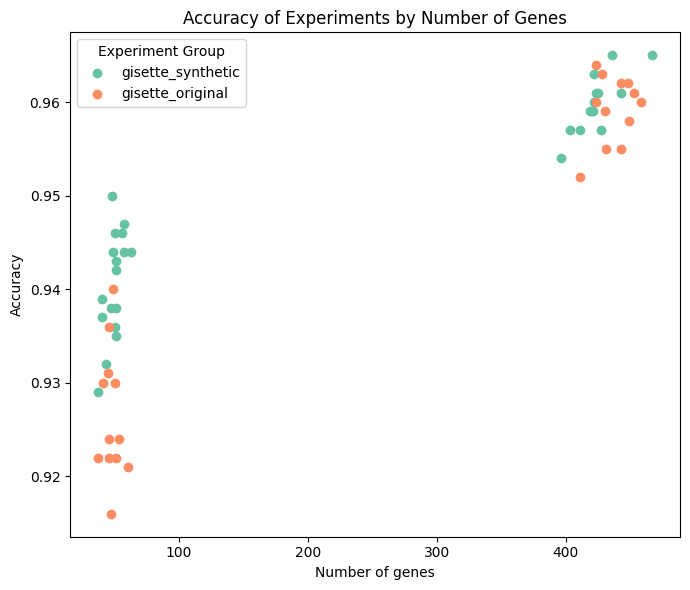

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Factorize the 'experiment_group' to get labels and unique ids
groups, labels = pd.factorize(gisette['experiment_group'])

# Set up the matplotlib figure
plt.figure(figsize=(7, 6))

# Plot all data without condition on 'pob_ngenes_avg'
for i, label in enumerate(labels):
    group_data = gisette[groups == i]
    plt.scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)


# Set plot titles and labels
plt.title('Accuracy of Experiments by Number of Genes')
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')

# Add a legend to the plot
plt.legend(title="Experiment Group")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Gráfico de resultados por grupo de experimentos

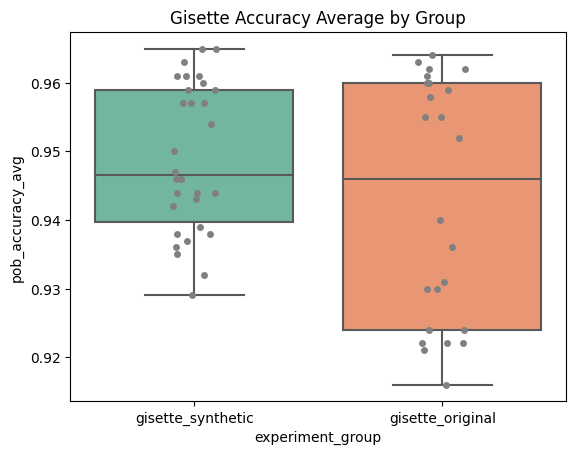

In [45]:
# plot the leukemias accuracy average by group
# set the same palette for all plots
sns.set_palette("Set2")
sns.boxplot(x='experiment_group', y='pob_accuracy_avg', data=gisette)
# add data point in grey
sns.stripplot(x='experiment_group', y='pob_accuracy_avg', data=gisette, color='grey')
plt.title('Gisette Accuracy Average by Group')
plt.show()
